In [2]:
import pandas as pd
from pandas import Series,DataFrame

# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

# A preview of the data - Survived/SibSp/Parch(Parent or child on board) column --> 0 means false
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!
#First some basic questions:
#1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
#2.) What deck were the passengers on and how does that relate to their class?
#3.) Where did the passengers come from?
#4.) Who was alone and who was with family?

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

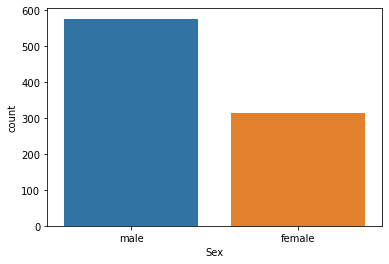

In [7]:
#Division between male and female passengers, ratio almost 2 to 1 
sns.countplot('Sex',data=titanic_df)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


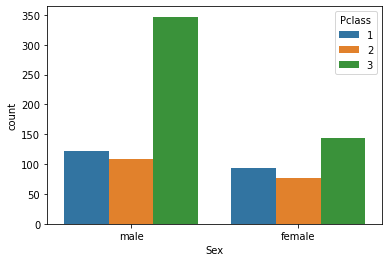

In [8]:
# A lot of male passengers in 3rd class, ratio-wise less for female passengers
sns.countplot('Sex',data=titanic_df,hue='Pclass')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

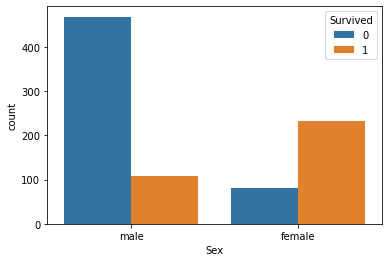

In [9]:
#Survival rate among men and women, 1 = True(survived)
sns.countplot('Sex',data=titanic_df,hue='Survived')

In [10]:
#Defining a function that return 'child' if younger than 16, otherwise return sex
def men_women_children(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [11]:
def men_women_boygirl(passenger):
    age,sex = passenger
    if age < 16:
        if sex == 'male':
            return 'boy'
        return 'girl'
             
    else:
        return sex

In [26]:

# Making distinction between boys and girls
titanic_df['person2'] = titanic_df[['Age','Sex']].apply(men_women_boygirl,axis=1)

In [27]:
# Adding 25% to the price
titanic_df['adj price'] = (titanic_df['Fare'] * 1.25)

In [28]:
# Creating a now column with written function. Column created by taking age and sex as arguments for function

titanic_df['person'] = titanic_df[['Age','Sex']].apply(men_women_children,axis=1)

In [29]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person2,adj price,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,9.062500,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,89.104125,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,9.906250,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,66.375000,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,10.062500,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,10.572875,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,64.828125,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,boy,26.343750,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,13.916625,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,girl,37.588500,child


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


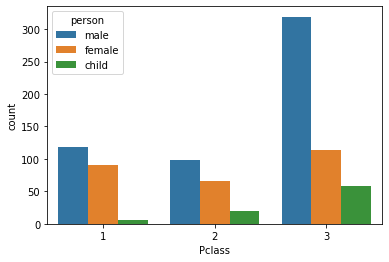

In [30]:
# A divison of the 3 classes among persons column
sns.countplot('Pclass',data=titanic_df,hue='person')
plt.show()

No handles with labels found to put in legend.


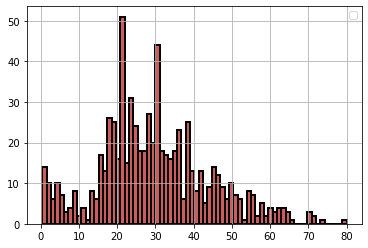

In [179]:
# Distribution of age of passengers
titanic_df['Age'].hist(bins=70,edgecolor='black',linewidth=2,color='indianred')
plt.le

In [32]:
# Mean of age
titanic_df['Age'].mean()

29.69911764705882

In [33]:
# Most expensive ticket
titanic_df['Fare'].max()

512.3292

In [180]:
# Value counts of newly added column person(man,woman,child)
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [181]:
#Value counts of Pclass division
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

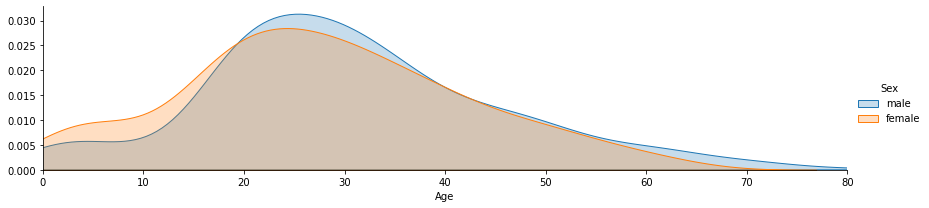

In [182]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

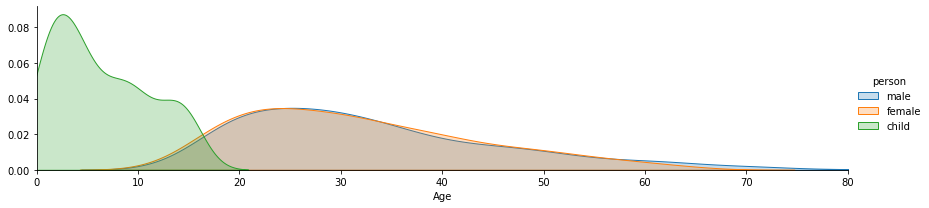

In [183]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

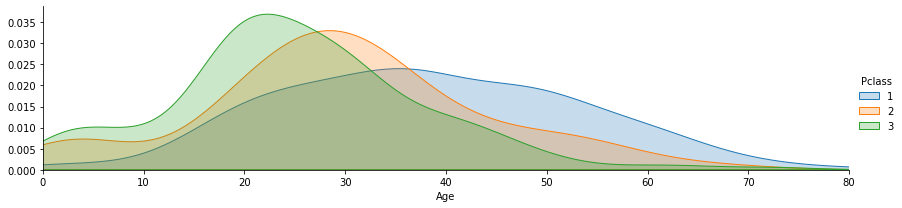

In [186]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()



In [187]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person2,adj price,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,9.062500,male,With Family,no,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,89.104125,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,9.906250,female,Alone,yes,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,66.375000,female,With Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,10.062500,male,Alone,no,n


In [40]:
# Dropping NaN values in Cabin column, creating a new object containing the cleaned column
deck = titanic_df['Cabin'].dropna()

In [41]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='count'>

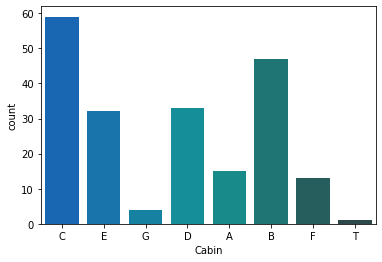

In [42]:
# Now there is a column of Cabin without null values, now using a for loop to get first letter(specifies deck):

levels = []  # empty list

for level in deck:            # create a for loop that takes 1st letter 'Cabin'
    levels.append(level[0])   # append it to a list
    
cabin_df = DataFrame(levels)  # create object containing a dataframe with created list
cabin_df.columns = ['Cabin']  # resetting column
sns.countplot('Cabin',data=cabin_df,palette='winter_d') # create plot

<AxesSubplot:xlabel='Cabin', ylabel='count'>

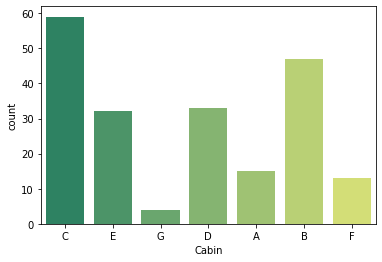

In [93]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']  # Dropping T column as it does not make sense
sns.countplot('Cabin',data=cabin_df,palette='summer') 

In [44]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person2,adj price,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,9.062500,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,89.104125,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,9.906250,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,66.375000,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,10.062500,male


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

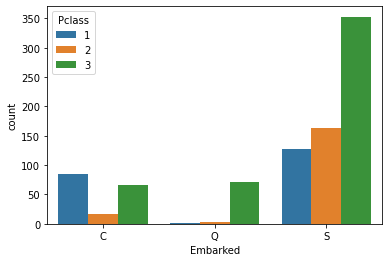

In [46]:
# Visualizing where passengers embarked from, divided into classes
## Almost everyone embarked from Queenstown was a 3rd class passenger.. 
# what is the econ. situation in this town?



sns.countplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])

In [47]:
# Who was alone and who had family on board? Creating a new column, 0 means alone

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [49]:
# Resetting column values to With Family or Alone
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family' # location where alone >0, return 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone' # location where alone ==0, return 'Alone'

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [50]:
titanic_df.head() # Getting a preview of the new column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person2,adj price,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,9.062500,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,89.104125,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,9.906250,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,66.375000,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,10.062500,male,Alone


In [ ]:
# What factors contributed to people surviving?

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alone', ylabel='count'>

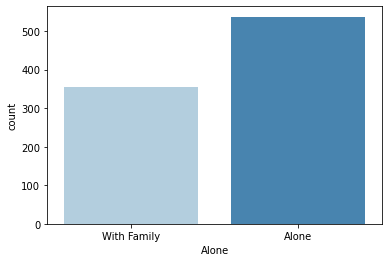

In [51]:
sns.countplot('Alone',data=titanic_df,palette='Blues')# Visualizing column, more people boarded alone

In [52]:
#Creating a new column Survivor, it takes info from Survived column, map function returns no for 0 etc
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
                                                                    

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survivor', ylabel='count'>

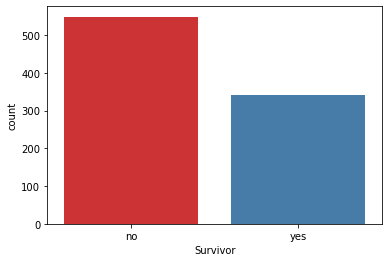

In [54]:
sns.countplot('Survivor',data=titanic_df,palette='Set1') # Visualizing new data

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


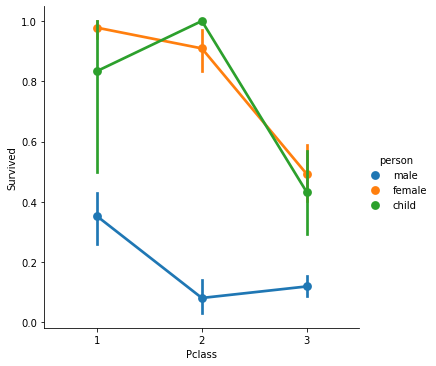

In [63]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df) # Surival rate lower among 3rd class, also
                                                                 # factoring in the person column
                                                                 # being 3rd class and male not favorable

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survivor', ylabel='count'>

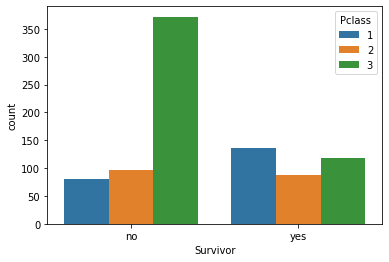

In [60]:
sns.countplot('Survivor',hue='Pclass',data=titanic_df) # Count of no among Survivor @ 3rd class

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


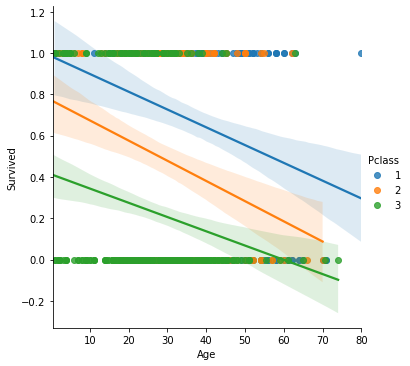

In [65]:
# A linear plot correlating between Survived and Age, the older ==> less likely to survive
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df)     # adding Pclass 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


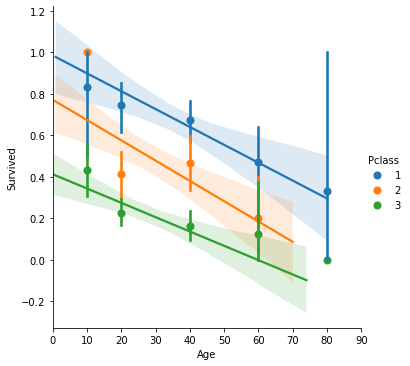

In [76]:
# Let's clean this up a little, by binning the ages into bins

generations = [10,20,40,60,80]

# Visualize in same manner, add bins argument

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generations)  
plt.xticks(range(0,100,10))
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


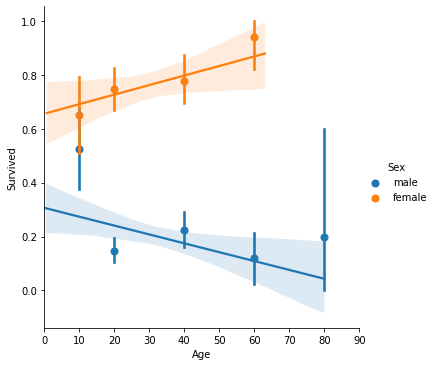

In [81]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generations) # How do gender/age relate to Survival?
plt.xticks(range(0,100,10))
plt.show()

# The older you are as a female, the more likely you are to survive
# Older men less likely to survive, but a wide std

In [ ]:
#1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
#2.) Did having a family member increase the odds of surviving the crash?

In [109]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person2,adj price,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,9.062500,male,With Family,no,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,89.104125,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,9.906250,female,Alone,yes,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,66.375000,female,With Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,10.062500,male,Alone,no,n


In [104]:
titanic_df['Deck'] = titanic_df['Cabin'].astype(str).str[0]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Deck', ylabel='count'>

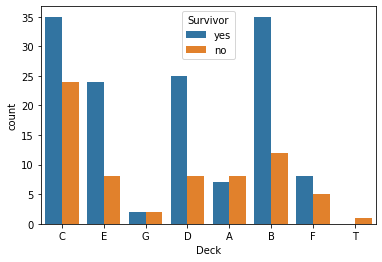

In [117]:
sns.countplot('Deck',hue='Survivor',data=deck_list)

In [136]:
deck_list = titanic_df[(titanic_df.Deck != 'n') |
                      (titanic_df.Deck != 'T')]



In [138]:
len(deck_list)

891

In [155]:

deck_list = titanic_df[titanic_df.Deck != 'n']

In [156]:
len(deck_list)

204

In [165]:

deck_list = titanic_df[(titanic_df.Deck == 'A')|
                        (titanic_df.Deck =='B')|
                        (titanic_df.Deck =='C')|
                        (titanic_df.Deck =='D')|
                        (titanic_df.Deck =='E')|
                        (titanic_df.Deck =='F')]

In [166]:
len(deck_list)

199

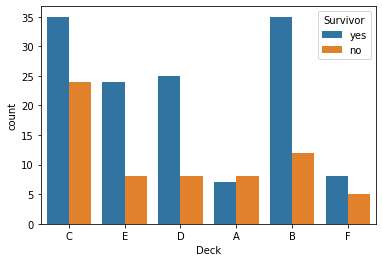

In [171]:
#1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
sns.countplot('Deck',hue='Survivor',data=deck_list)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


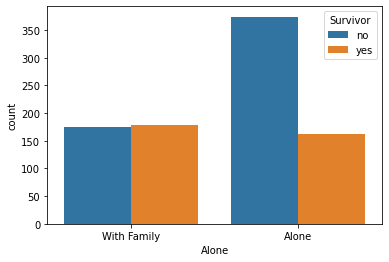

In [178]:
#2.) Did having a family member increase the odds of surviving the crash?
# 
sns.countplot('Alone',hue='Survivor',data=titanic_df)
plt.show()

<AxesSubplot:xlabel='Alone', ylabel='count'>

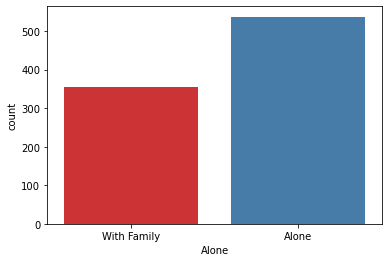

In [177]:
sns.countplot('Alone',data=titanic_df,palette='Set1')